<a href="https://colab.research.google.com/github/06-pooja/EDA_project/blob/main/Personal_Colab_Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

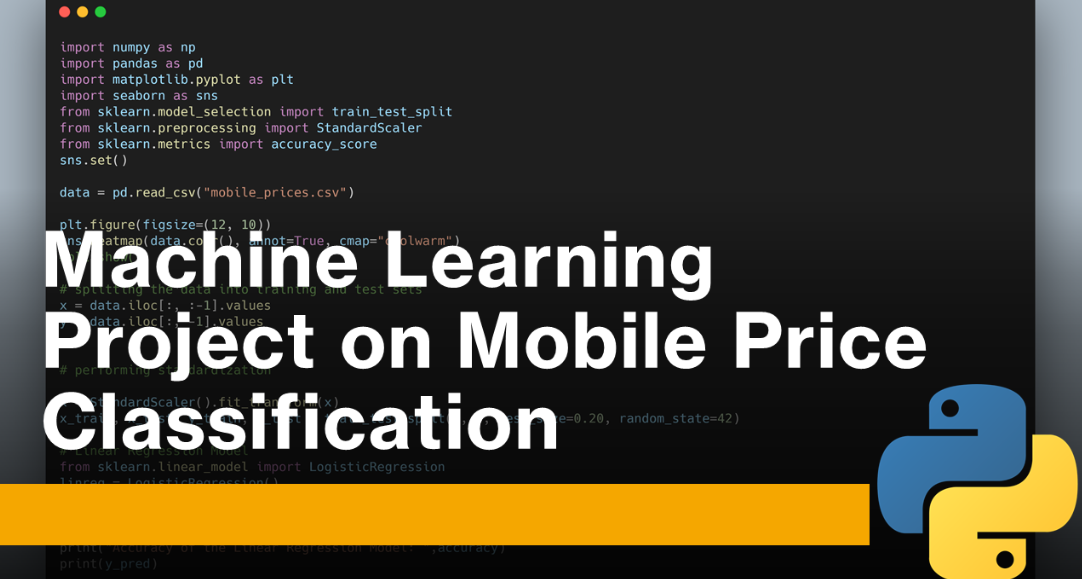

# <b><u> Project Title : Mobile Price Range Prediction </u></b>


# **Project Summary -**

#In the competitive mobile phone market companies want
#to understand sales data of mobile phones and factors which drive the prices.
#The objective is to find out some relation between features of a mobile phone(eg:- RAM,
#Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
#actual price but a price range indicating how high the price is.
#The Mobile Price Range Prediction Machine Learning (ML) model is designed to estimate the price category of mobile phones based on a set of features. This model is valuable for both consumers looking to make informed purchasing decisions and mobile manufacturers seeking to optimize pricing strategies.




#Key Components:

#Data Collection: The model relies on a diverse dataset of mobile phones, including their specifications, features, and corresponding price ranges. This data is essential for training and testing the model.

#Feature Selection: To build an accurate prediction model, relevant features are chosen from the dataset. These features may include processor speed, camera quality, storage capacity, brand, screen size, and more.

#Data Preprocessing: Data preprocessing involves handling missing values, feature scaling, and encoding categorical variables. It ensures that the data is in a suitable format for the ML model.

#Model Selection: The ML model selection depends on the problem's nature. Common choices include decision trees, random forests, support vector machines, or deep learning techniques like neural networks.

#Model Training: The selected model is trained using the preprocessed data. During training, the model learns to make predictions based on the input features and their relationship with mobile price ranges.

#Hyperparameter Tuning: Fine-tuning the model's hyperparameters is crucial for optimizing its predictive performance. Cross-validation techniques are often employed to find the best hyperparameters.

#Model Evaluation: The model's accuracy and performance are evaluated using evaluation metrics such as accuracy score,precision score,recall scores or f1 score . This step ensures the model's reliability and generalization to unseen data.


#Use Cases:

#Consumers: Mobile shoppers can use the model to estimate the price range of a mobile phone based on their desired features, aiding in purchase decisions.

#Mobile Manufacturers: Mobile manufacturers can leverage the model to optimize pricing strategies by understanding how different features impact pricing.


#**Github link-**  



## **Pooja Bramhvanshi -**https://github.com/06-pooja/EDA_project/blob/main/Personal_Colab_Mobile_price_range_prediction.ipynb

#**Data Science Problem Statement**
---
#Using multiple ML models to predict the mobile price range and compare the evaluation metrics for all of them to find the best model.



#**Data Description** -
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

###**Importing Libararies**

In [ ]:
# importing the required libraries

import warnings    # do not disturb mode
warnings.filterwarnings('ignore')

import missingno as msno

import numpy as np   # numerical computations
import pandas as pd  # Data Manupulation

import matplotlib.pyplot as plt  # visualize with plots
%matplotlib inline
import seaborn as sns


import scipy.stats as stats   # statistics

# split train and test data
from sklearn.model_selection import train_test_split

# scale the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# importing sklearn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
#Importing sklearn gridsearch for hyperpaqrameter tunning

from sklearn.model_selection import GridSearchCV, cross_val_score

# Importing Sklearn metrics for model evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score


#importing libraries for tree visualisation
from sklearn.tree import  export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

###**Dataset Loading**

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Mounted at /content/drive


In [ ]:
#defining file path
file_path= ('/content/drive/MyDrive/Almabetter/Capstone/Classification model/data_mobile_price_range.csv')
df= pd.read_csv(file_path)

###**Dataset firstView**

In [ ]:
#first view of our data
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
#for better understanding changed some columns name
df.rename(columns={'blue':'Bluetooth','fc':'Fcamera mega pixel','four_g':'4G','m_dep':'moblie_depth','pc':'main_camera','three_g':'3G','Fcamera mega pixel':'front_camera'},inplace=True)

In [ ]:
#It gives Top 5 rows of Dataset
df.head()

,battery_power,Bluetooth,clock_speed,dual_sim,Fcamera mega pixel,4G,int_memory,moblie_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# It's give total no of rows and column of our data set
print(f'we have total {df.shape[0]} rows and{df.shape[1]} columns.')

we have total 2000 rows and21 columns.


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_power       2000 non-null   int64  
 1   Bluetooth           2000 non-null   int64  
 2   clock_speed         2000 non-null   float64
 3   dual_sim            2000 non-null   int64  
 4   Fcamera mega pixel  2000 non-null   int64  
 5   4G                  2000 non-null   int64  
 6   int_memory          2000 non-null   int64  
 7   moblie_depth        2000 non-null   float64
 8   mobile_wt           2000 non-null   int64  
 9   n_cores             2000 non-null   int64  
 10  main_camera         2000 non-null   int64  
 11  px_height           2000 non-null   int64  
 12  px_width            2000 non-null   int64  
 13  ram                 2000 non-null   int64  
 14  sc_h                2000 non-null   int64  
 15  sc_w                2000 non-null   int64  
 16  talk_t

###**Duplicate Value Count**

In [ ]:
# Dataset Duplicate Value Count
No_of_duplicate_rows=df[df.duplicated()].shape[0]
print(f'we hve total no {No_of_duplicate_rows} duplicate rows.')

we hve total no 0 duplicate rows.



Having no duplicate values makes the dataset easier for us to work with.

###What did you know about your dataset?

We get to know the following points about our dataset:
1. The dataset contains 2000 rows and 21 columns.
2. The dataset don't have any duplicated observations.
3. 'clock_speed' and ' moblie_depth' feature is of float dype and rest others are integers.

###**Understanding Variable**

In [ ]:
# Dataset Describe
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
Bluetooth,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
Fcamera mega pixel,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
4G,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
moblie_depth,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'Bluetooth', 'clock_speed', 'dual_sim',
       'Fcamera mega pixel', '4G', 'int_memory', 'moblie_depth', 'mobile_wt',
       'n_cores', 'main_camera', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', '3G', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**We have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.**

###**Data preprocessing**

In [ ]:
#checking null values
df.isnull().sum()

battery_power         0
Bluetooth             0
clock_speed           0
dual_sim              0
Fcamera mega pixel    0
4G                    0
int_memory            0
moblie_depth          0
mobile_wt             0
n_cores               0
main_camera           0
px_height             0
px_width              0
ram                   0
sc_h                  0
sc_w                  0
talk_time             0
3G                    0
touch_screen          0
wifi                  0
price_range           0
dtype: int64

<Axes: >

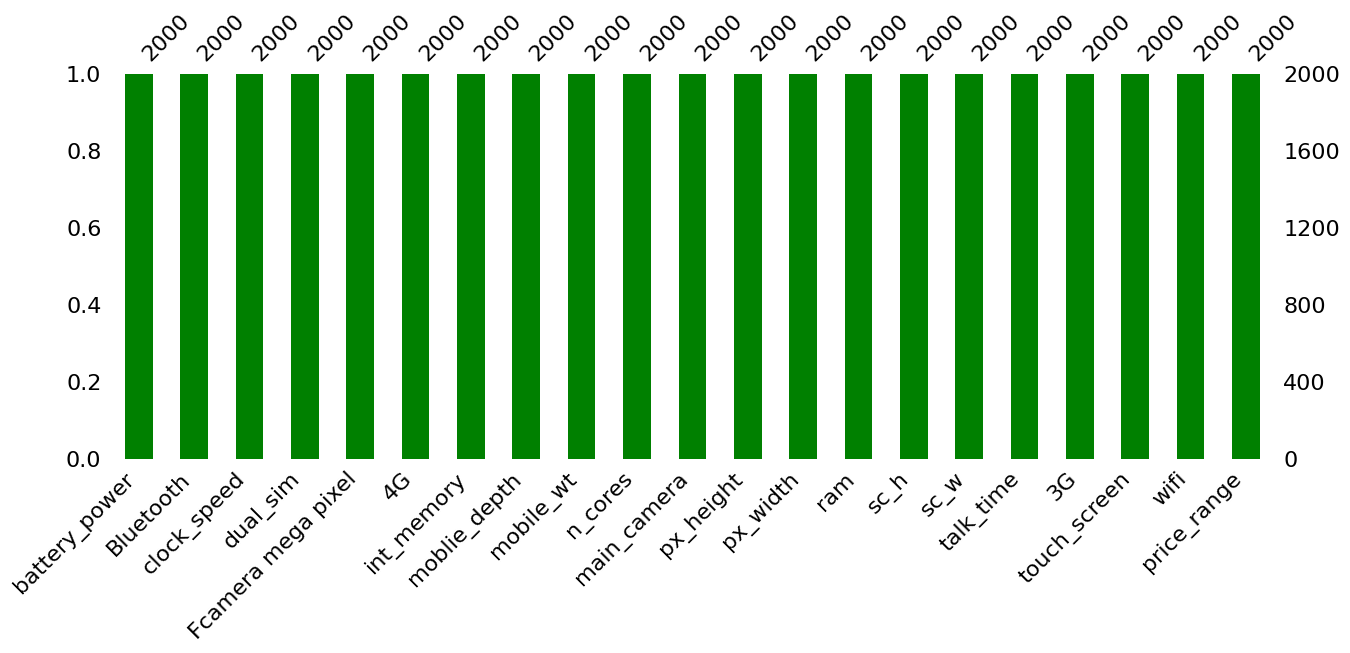

In [ ]:
# Visualizing the missing values
msno.bar(df,figsize=(15,5), color="green")

It's good to see that our dataset have no missing values

###**Data Manuplation**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'battery_power'),
  Text(1, 0, 'Bluetooth'),
  Text(2, 0, 'clock_speed'),
  Text(3, 0, 'dual_sim'),
  Text(4, 0, 'Fcamera mega pixel'),
  Text(5, 0, '4G'),
  Text(6, 0, 'int_memory'),
  Text(7, 0, 'moblie_depth'),
  Text(8, 0, 'mobile_wt'),
  Text(9, 0, 'n_cores'),
  Text(10, 0, 'main_camera'),
  Text(11, 0, 'px_height'),
  Text(12, 0, 'px_width'),
  Text(13, 0, 'ram'),
  Text(14, 0, 'sc_h'),
  Text(15, 0, 'sc_w'),
  Text(16, 0, 'talk_time'),
  Text(17, 0, '3G'),
  Text(18, 0, 'touch_screen'),
  Text(19, 0, 'wifi'),
  Text(20, 0, 'price_range')])

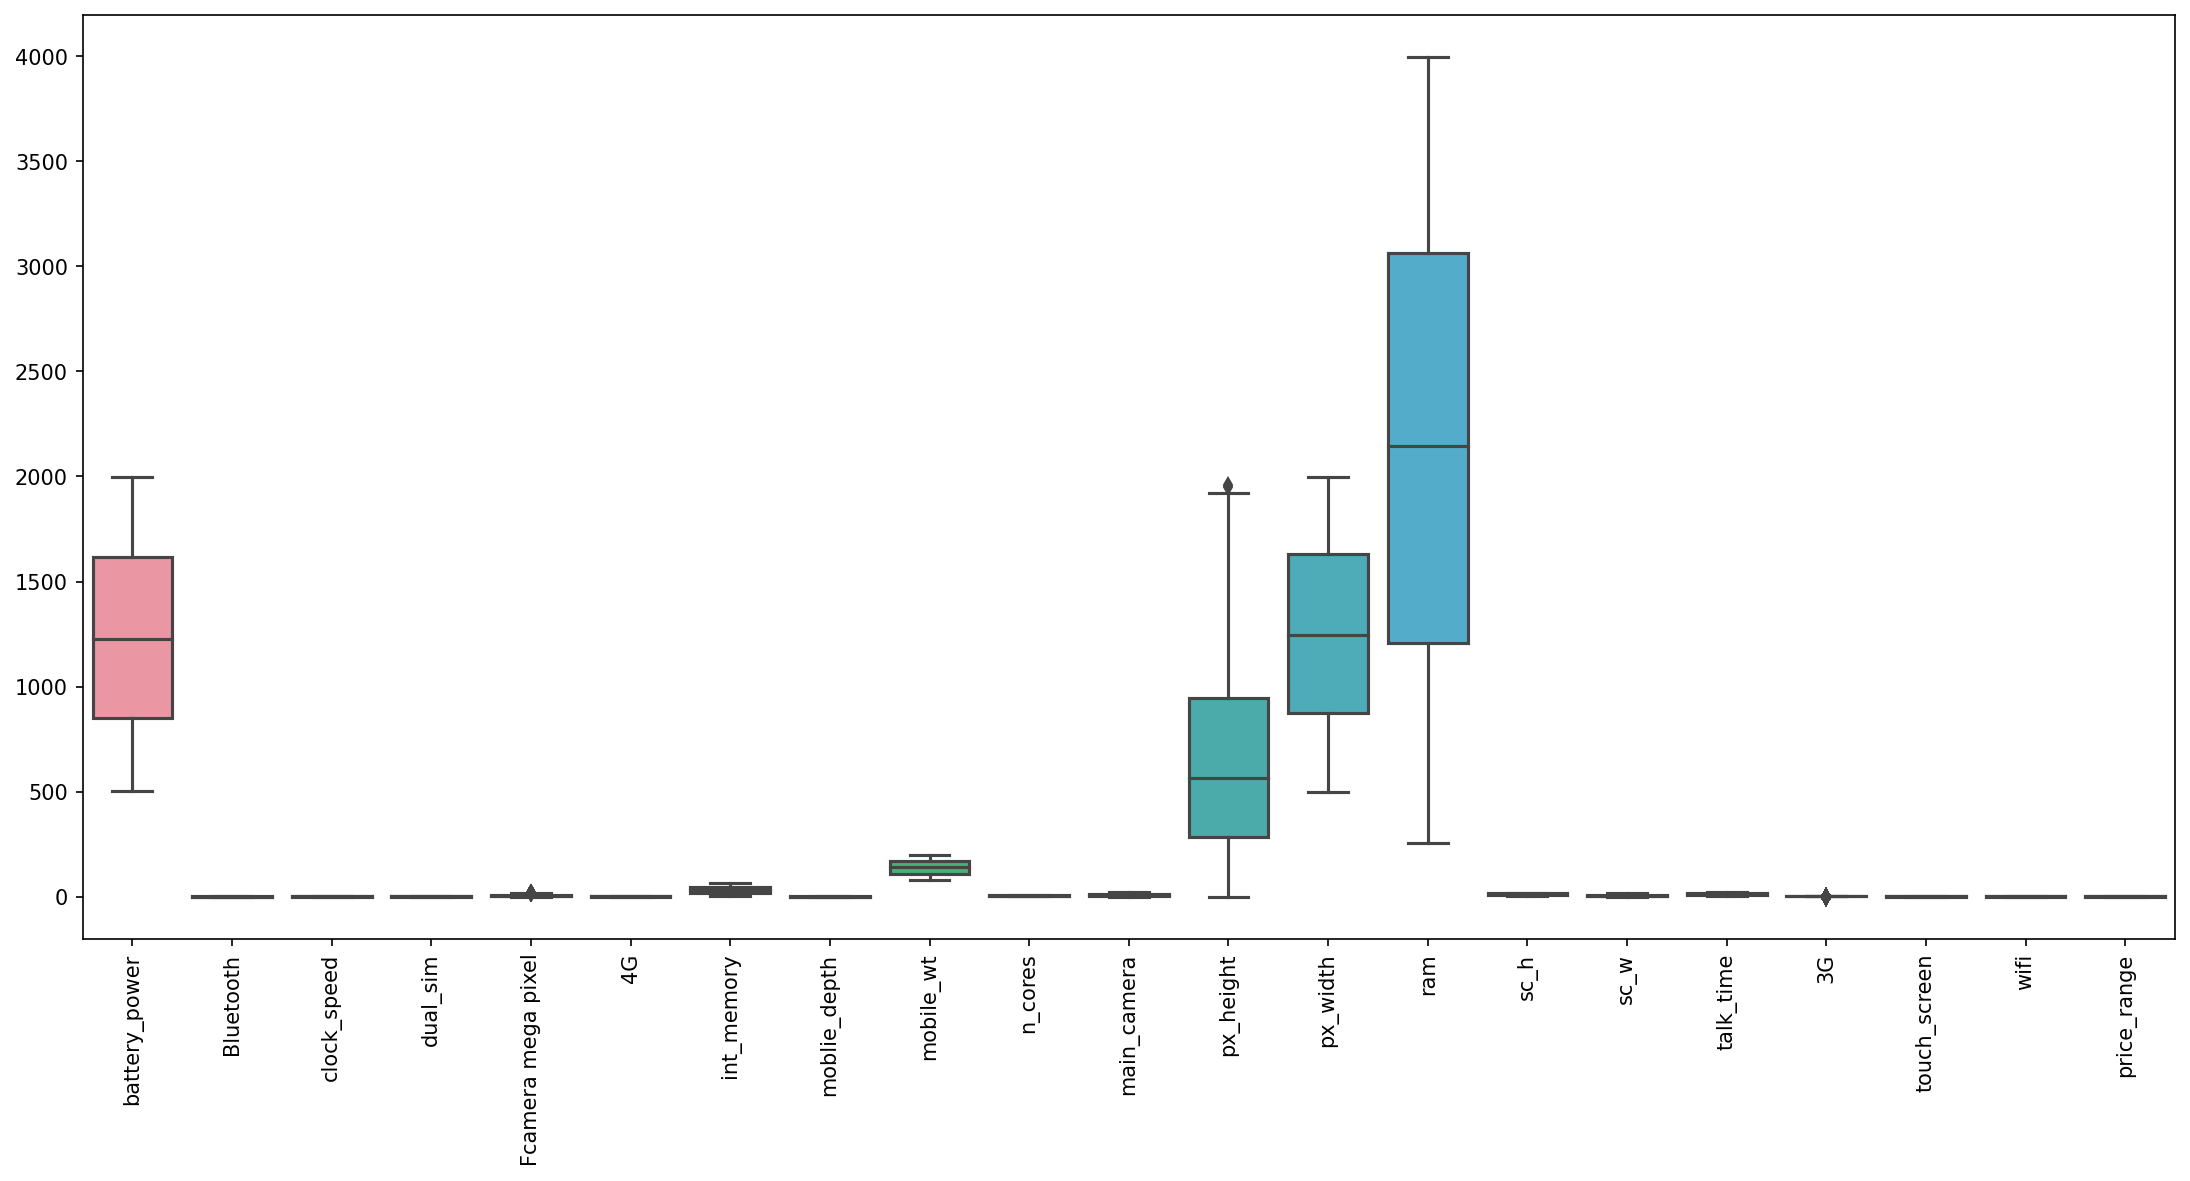

In [ ]:
# checking outliers in dataset

# Create a figure with custom size and resolution
plt.figure(figsize=(18,8),dpi=150)

# Create a box plot for the data in the DataFrame
sns.boxplot(data = df)


# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

In [ ]:
# Define the IQR threshold for outlier detection
iqr_threshold = 1.5  # You can adjust this threshold as needed

# Calculate the IQR for each column in the DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask to identify outliers
outlier_mask = ((df < (Q1 - iqr_threshold * IQR)) | (df > (Q3 + iqr_threshold * IQR))).any(axis=1)

# Remove rows with outliers
df_cleaned = df[~outlier_mask]




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'battery_power'),
  Text(1, 0, 'Bluetooth'),
  Text(2, 0, 'clock_speed'),
  Text(3, 0, 'dual_sim'),
  Text(4, 0, 'Fcamera mega pixel'),
  Text(5, 0, '4G'),
  Text(6, 0, 'int_memory'),
  Text(7, 0, 'moblie_depth'),
  Text(8, 0, 'mobile_wt'),
  Text(9, 0, 'n_cores'),
  Text(10, 0, 'main_camera'),
  Text(11, 0, 'px_height'),
  Text(12, 0, 'px_width'),
  Text(13, 0, 'ram'),
  Text(14, 0, 'sc_h'),
  Text(15, 0, 'sc_w'),
  Text(16, 0, 'talk_time'),
  Text(17, 0, '3G'),
  Text(18, 0, 'touch_screen'),
  Text(19, 0, 'wifi'),
  Text(20, 0, 'price_range')])

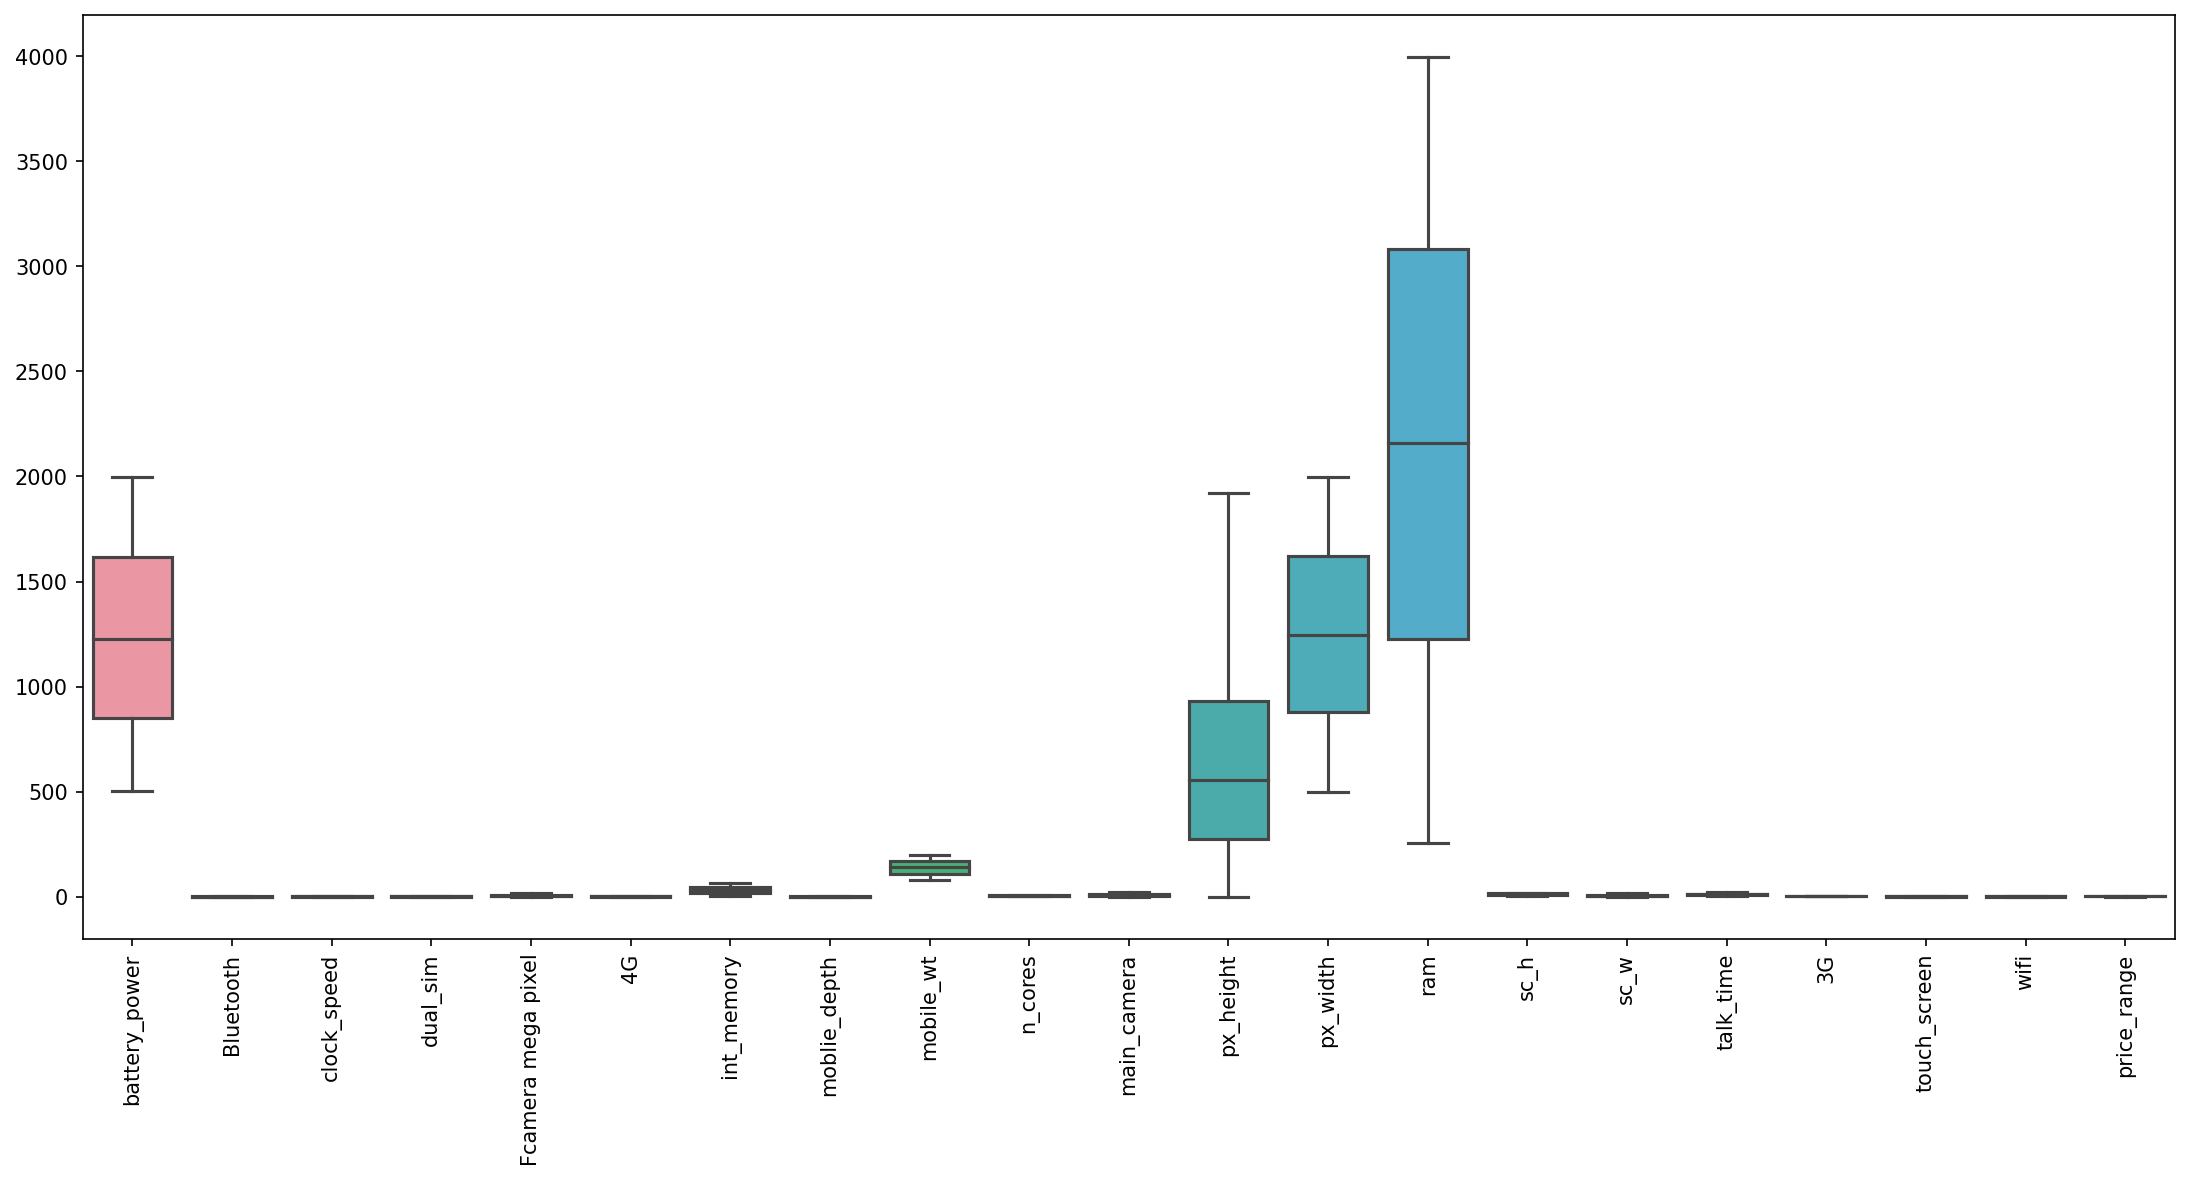

In [ ]:
# Create a figure with custom size and resolution
plt.figure(figsize=(18,8),dpi=150)

# Create a box plot for the data in the DataFrame `df_cleaned`
sns.boxplot(data = df_cleaned)


# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

###**Data Manupulation**

In [ ]:
# create copy of mobile_data
new_df=df_cleaned.copy()

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# create new colom screen size and pixels
new_df['Pixels']=new_df['px_height']*new_df['px_width']
new_df['screen size'] =new_df['sc_h']*new_df['sc_w']

In [ ]:
# Get the column you want to move to the last position
column_to_move = 'price_range'

In [ ]:
# Remove the column from its current position and add it to the last position
new_df[column_to_move] = new_df.pop(column_to_move)

In [ ]:
#drop least important columns

new_df.drop(['clock_speed','mobile_wt','touch_screen','px_height','px_width','sc_h','sc_w'],axis=1,inplace=True)


In [ ]:
new_df

,battery_power,Bluetooth,dual_sim,Fcamera mega pixel,4G,int_memory,moblie_depth,n_cores,main_camera,ram,talk_time,3G,wifi,Pixels,screen size,price_range
1,1021,1,1,0,1,53,0.7,3,6,2631,7,1,0,1799140,51,2
2,563,1,1,2,1,41,0.9,5,6,2603,9,1,0,2167308,22,2
3,615,1,0,0,0,10,0.8,6,9,2769,11,1,0,2171776,128,2
4,1821,1,0,13,1,44,0.6,2,14,1411,15,1,0,1464096,16,1
5,1859,0,1,3,0,22,0.7,1,7,1067,10,1,0,1660616,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,6,14,668,19,1,0,2309580,52,0
1996,1965,1,1,0,0,39,0.2,4,3,2032,16,1,1,1797975,110,2
1997,1911,0,1,1,1,36,0.7,8,3,3057,5,1,0,1416576,9,3
1998,1512,0,0,4,1,46,0.1,5,5,869,19,1,1,225120,180,0


### **Feature selection**

In [ ]:
X = new_df.iloc[:,0:-2]#independent variable
y = new_df.iloc[:,-1]#target variable


##**Data Spliting**

In [ ]:
#Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('price_range', axis=1),
                                                    new_df['price_range'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((1054, 15), (452, 15))

### **Data Scaling**

In [ ]:
# fit the scaler to the train set, it will learn the parameters
scaler = StandardScaler()

scaler.fit(X_train)

# transform train and test sets
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


***As we can see, the training and test accuracy of the Decision Tree Classifier model is quite low. That's why I've decided to perform hyperparameter tuning to enhance model performance.***

In [ ]:
# creating model with hyperparameter tuning


# Hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(Price_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
# Best model
best_model = grid_search.best_estimator_

In [ ]:
# prediction classes
dt_pred_train = best_model.predict(X_train)
dt_pred_test = best_model.predict(X_test)

#prediction probabilities
dt_proba_train = best_model.predict_proba(X_train)
dt_proba_test = best_model.predict_proba(X_test)

In [ ]:
# Evaluate the accuracy scores

dt_train_accuracy = accuracy_score(dt_pred_train,y_train)
dt_test_accuracy = accuracy_score(dt_pred_test,y_test)

print("Decision tree classifier model train accuracy with hyperparameter tuning  is ",dt_train_accuracy )
print("Decision tree classifier model test accuracy hyperparameter tuning is ",dt_test_accuracy)

# Perform K-fold cross-validation, e.g., 5-fold
dt_cv_score = cross_val_score(grid_search, X_train, y_train, cv=5, scoring='accuracy').mean()
print("Price_clf cv score is ",dt_cv_score )

In [ ]:
# Get the confusion matrix for decision tree classifier train set

labels = ['0', '1','2','3']
dt_cm = confusion_matrix(y_train, dt_pred_train)
print(cm)

ax= plt.subplot()
sns.heatmap(dt_cm, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16}) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for decision tree classifier test set

labels = ['0', '1','2','3']
dt_cm1 = confusion_matrix(y_test, dt_pred_test)
print(dt_cm1)

ax= plt.subplot()
sns.heatmap(dt_cm1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16}) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Evaluate metric score charts


dt_accuracy=accuracy_score(y_test,dt_pred_test)*100
dt_precision=precision_score(y_test,dt_pred_test,average='macro')*100
dt_recall=recall_score(y_test,dt_pred_test,average='macro')*100
dt_f1=f1_score(y_test,dt_pred_test,average='macro')*100
dt_roc_auc=roc_auc_score(y_test, dt_proba_test, multi_class='ovo', average='macro')*100

print("The accuracy score of decision tree classifier is",dt_accuracy)
print("The precision score of decision tree classifier is",dt_precision)
print("The recall score of decision tree classifier is",dt_recall)
print("The f1 score of decision tree classifier is",dt_f1)
print("The roc_auc_ score of decision tree classifier is",dt_roc_auc)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, dt_proba_test[:,i], pos_label=i)

# plotting multiclass ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
print(classification_report(y_test,dt_pred_test ))

In [ ]:
# Create a graphical representation of the Decision Tree using Graphviz
graph = Source(tree.export_graphviz(best_model, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1','2','3']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
DT_feature_importance =best_model.feature_importances_


In [ ]:
feature_names = X.columns

# Sort the features by importance and select the top N
sorted_indices = np.argsort(DT_feature_importance)[::-1]


# Check if the indices in sorted_indices are within the valid range
Valid_indices = [i for i in sorted_indices if 0 <= i < len(feature_names)]

N = 10
top_feature_names = [feature_names[i] for i in Valid_indices[:N]]

top_feature_importance = DT_feature_importance[Valid_indices][:N]

# Create a bar plot to visualize the top N features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top Feature Importance in Decision Tree Classifier')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

## **KNN Model**

In [ ]:
# Create a KNN classifier
Knn = KNeighborsClassifier()

In [ ]:
# Fit the model to the training data
Knn.fit(X_train_scaled, y_train)

In [ ]:
# prediction classes
Knn_pred_train = Knn.predict(X_train_scaled)
Knn_pred_test = Knn.predict(X_test_scaled)

#prediction probabilities
Knn_proba_train = Knn.predict_proba(X_train_scaled)
Knn_proba_test = Knn.predict_proba(X_test_scaled)

In [ ]:
# Evaluate the accuracy scores

Knn_train_accuracy = accuracy_score(Knn_pred_train,y_train)
Knn_test_accuracy = accuracy_score(Knn_pred_test,y_test)

print("Knn model train accuracy is",Knn_train_accuracy )
print("Knn model test accuracy is",Knn_test_accuracy)

# Perform K-fold cross-validation, e.g., 5-fold
Knn_cv_score = cross_val_score(Knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
print("Knn cv score is",Knn_cv_score )

###Knn model test accuracy was very low we need to do hyperparameter tuning

In [ ]:
# Define a custom range for n_neighbors
n_neighbors_range = range(5, 20)  # Adjust the starting and ending values as needed

# Create a parameter grid with the custom range
param_grid_knn = {
    'n_neighbors': list(n_neighbors_range),  # Convert the range to a list
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [ ]:
# GridSearchCV for hyperparameter tuning
grid_search_Knn = GridSearchCV(Knn, param_grid_knn, cv=3)
grid_search_Knn.fit(X_train_scaled, y_train)

In [ ]:
# Best hyperparameters
best_params1 = grid_search_Knn.best_params_
print("Best Hyperparameters:", best_params1)

In [ ]:
# Best model
best_model1 = grid_search_Knn.best_estimator_

best_model1

In [ ]:
# prediction classes
KNN_pred_train = best_model1.predict(X_train_scaled)
KNN_pred_test = best_model1.predict(X_test_scaled)

#prediction probabilities
KNN_proba_train = best_model1.predict_proba(X_train_scaled)
KNN_proba_test = best_model1.predict_proba(X_test_scaled)

In [ ]:
# Evaluate the accuracy scores

KNN_train_accuracy = accuracy_score(KNN_pred_train,y_train)
KNN_test_accuracy = accuracy_score(KNN_pred_test,y_test)

print("Knn model train accuracy is",KNN_train_accuracy )
print("Knn model test accuracy is",KNN_test_accuracy)

# Perform K-fold cross-validation, e.g., 5-fold
KNN_cv_score = cross_val_score(best_model1, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
print("Knn cv score is",KNN_cv_score )

In [ ]:
# Get the confusion matrix for KNN classifier train set

labels = ['0', '1','2','3']
KNN_cm = confusion_matrix(y_train, KNN_pred_train)
print(KNN_cm)

ax= plt.subplot()
sns.heatmap(KNN_cm, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16}) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for KNN classifier test set

labels = ['0', '1','2','3']
KNN_cm1 = confusion_matrix(y_test, KNN_pred_test)
print(KNN_cm1)

ax= plt.subplot()
sns.heatmap(KNN_cm1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16}) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Evaluate metric score charts

KNN_accuracy=accuracy_score(y_test,KNN_pred_test)*100
KNN_precision=precision_score(y_test,KNN_pred_test,average='macro')*100
KNN_recall=recall_score(y_test,KNN_pred_test,average='macro')*100
KNN_f1=f1_score(y_test,KNN_pred_test,average='macro')*100
KNN_roc_auc=roc_auc_score(y_test, KNN_proba_test, multi_class='ovo', average='macro')*100


print("The accuracy score of KNN classifier is",accuracy_score(y_test,KNN_pred_test)*100)
print("The precision score of KNN classifier is",precision_score(y_test,KNN_pred_test,average='macro')*100)
print("The recall score of KNN classifier is",recall_score(y_test,KNN_pred_test,average='macro')*100)
print("The f1 score of KNN classifier is",f1_score(y_test,KNN_pred_test,average='macro')*100)
print("The roc_auc_ score of KNN classifier is",roc_auc_score(y_test, KNN_proba_test, multi_class='ovo', average='macro')*100)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, KNN_proba_test[:,i], pos_label=i)

# plotting multiclass ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
print(classification_report(y_test,KNN_pred_test ))

###In summary, the KNN classifier appears to perform reasonably well across these metrics. It has an accuracy, precision, and recall in the high 60s, suggesting it's moderately effective at classifying data. The F1 score also demonstrates a balanced performance, and the ROC AUC score indicates that the model is good at distinguishing between positive and negative cases.

In [ ]:
# Initialize lists to store metric names and values
metric_names = ['accuracy', 'precision', 'recall', 'f1','auc_roc']
metric_values_list = []

# Initialize index names for each set of predicted values
index_names = ['softmax regression', 'Decision tree Classifier','Kneighbour classifier']

# Loop through each set of predicted values
for pred_values in [sftmax_pred_test,dt_pred_test,KNN_pred_test]:
    metrics = {
        'accuracy score':accuracy_score(y_test,pred_values)*100,
        'precision score':precision_score(y_test,pred_values,average='macro')*100 ,
        'recall score': recall_score(y_test,pred_values,average='macro')*100,
        'f1 score':f1_score(y_test,pred_values,average='macro')*100 ,}
    metric_values_list.append(metrics)

# Create a DataFrame from the list of metric dictionaries
metrics_df = pd.DataFrame(metric_values_list,index=index_names)

In [ ]:
metrics_df

###**Conclusion**


###Based on the performance metrics you've provided for different machine learning models, it's possible to draw several conclusions regarding their effectiveness in a specific task. Let's analyze the results for each model and summarize our findings:

###**K-Nearest Neighbors (KNN) Classifier:**

###Accuracy Score: 67.04%
###Precision Score: 67.71%
###Recall Score: 67.12%
###F1 Score: 66.88%
###The KNN Classifier, in comparison to the other two models, shows lower accuracy, precision, recall, and F1 score. This indicates that the model may not be the best choice for this particular task. It has a relatively high precision score, suggesting that when it makes a positive prediction, it's often correct. However, its recall score is lower, which means it doesn't capture as many positive cases as the other models.

###In conclusion, the Softmax Regression model is the most effective among the three models for the given task, with high accuracy, precision, recall, and F1 score. The Decision Tree Classifier is a good alternative, offering a trade-off between performance and interpretability. However, the K-Nearest Neighbors Classifier appears to be less suitable for this task due to its lower overall performance. The choice of the best model depends on the specific requirements and trade-offs in your application, such as the need for accuracy, precision, recall, or model explainability.